In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('../data/prices_round_2_day_-1.csv', index_col='timestamp', delimiter=';')
df_coconuts = df.loc[df['product']=='COCONUTS'][['mid_price']]
df_pina_coladas = df.loc[df['product']=='PINA_COLADAS'][['mid_price']]

In [3]:
def stationarity_test(X, cutoff=0.01):
    # H_0 in adfuller is unit root exists (non-stationary)
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')

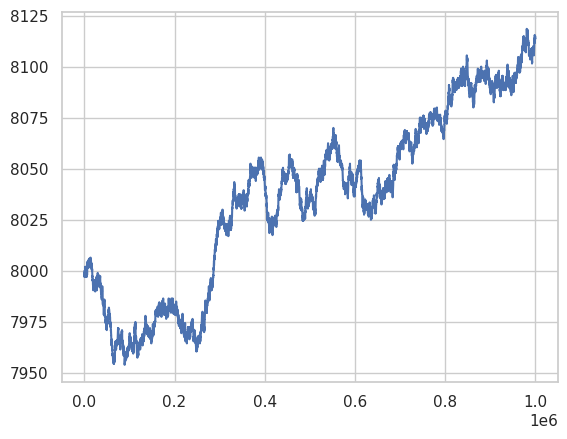

In [4]:
plt.plot(df_coconuts)

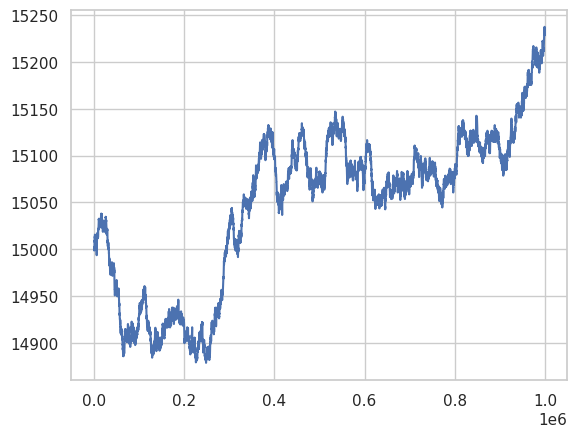

In [5]:

plt.plot(df_pina_coladas)

In [6]:
adfuller(df_coconuts/df_pina_coladas)[1]

0.14795279353651203

In [7]:
# X = df_coconuts.diff().dropna()['mid_price']
# Y = df_pina_coladas.diff().dropna()['mid_price']

In [8]:
X = df_coconuts
Y = df_pina_coladas

In [9]:
stationarity_test(X['mid_price'])

p-value = 0.9355227614750565 The series mid_price is likely non-stationary.


In [10]:
stationarity_test(Y['mid_price'])

p-value = 0.9172162611145069 The series mid_price is likely non-stationary.


<Figure size 1200x600 with 0 Axes>

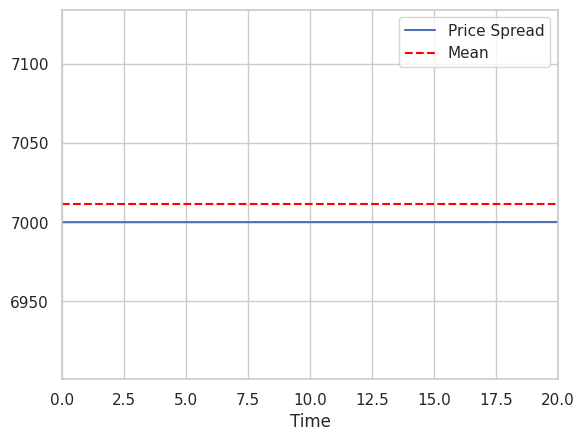

In [11]:
plt.figure(figsize=(12,6))
(Y - X).plot() # Plot the spread
plt.axhline((Y - X)['mid_price'].mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.xlim(0,20)
plt.legend(['Price Spread', 'Mean']);

In [12]:
score, pvalue, _ = coint(X,Y)
print(pvalue)

0.3389290531529962


In [13]:
S1 = X
S2 = Y

In [14]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['mid_price']
b = results.params['mid_price']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])